# **Imports**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

# **Read Data**

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

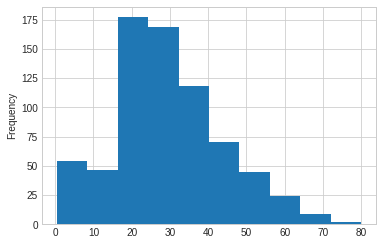

In [5]:
train.Age.plot.hist()


In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [9]:
test.shape

(418, 11)

In [10]:
gender_submission.head()


PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [11]:
gender_submission.shape

(418, 2)

#  **Missing Data**


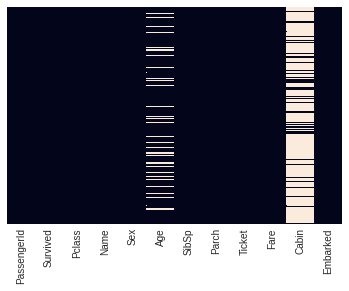

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False )

In [13]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Analyis Data

**Feature: Survived -->Target Value
**


0    549
1    342
Name: Survived, dtype: int64


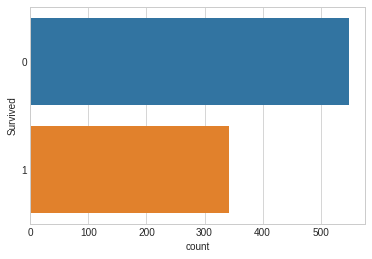

In [14]:
# How many people survived?

sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

Feature: **Pclass**

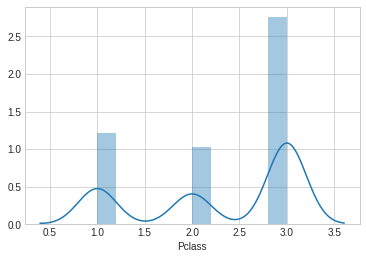

In [15]:
sns.distplot(train.Pclass)


Feature: Sex


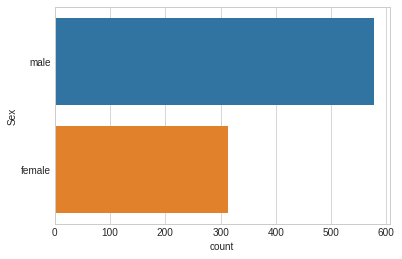

In [16]:
sns.countplot(y="Sex", data=train);

Feature: SibSp


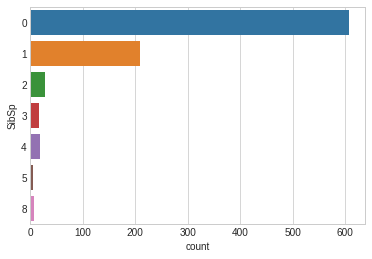

In [17]:
sns.countplot(y="SibSp", data=train)

Feature  : Parch

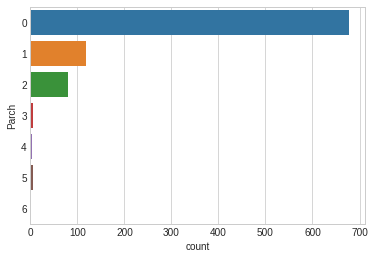

In [18]:
sns.countplot(y="Parch", data=train)

Feature: Ticket

# 

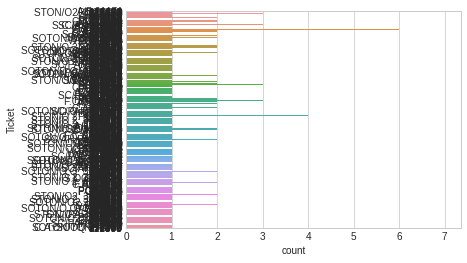

In [19]:
sns.countplot(y="Ticket", data=train);


feature : Embarked


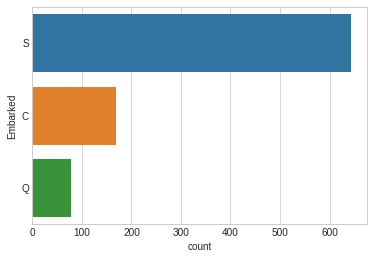

In [20]:
sns.countplot(y='Embarked', data=train);


Split Data to discretised continuous variables and  continuous variables

In [21]:
Discrite_var= pd.DataFrame() # for discretised continuous variables
Continuous_var = pd.DataFrame() # for continuous variables

In [22]:
#discretised continuous variables
Discrite_var['Survived'] = train['Survived']
Discrite_var['Pclass'] = train['Pclass']
Discrite_var['Sex'] = train['Sex']
Discrite_var['Sex'] = np.where(Discrite_var['Sex'] == 'female', 1, 0)
Discrite_var['SibSp'] = train['SibSp']
Discrite_var['Parch'] = train['Parch']
Discrite_var['Fare'] = pd.cut(train['Fare'], bins=5) 
Discrite_var['Embarked'] = train['Embarked']


#continuous variables
Continuous_var['Survived'] = train['Survived']
Continuous_var['Pclass'] = train['Pclass']
Continuous_var['Sex'] = train['Sex']
Continuous_var['SibSp'] = train['SibSp']
Continuous_var['Parch'] = train['Parch']
Continuous_var['Fare'] = train['Fare'] 
Continuous_var['Embarked'] = train['Embarked']



# 2 Nan Embarked
Continuous_var = Continuous_var.dropna(subset=['Embarked'])
Discrite_var = Discrite_var.dropna(subset=['Embarked'])

In [23]:
Continuous_var.head()

Survived  Pclass     Sex  SibSp  Parch     Fare Embarked
0         0       3    male      1      0   7.2500        S
1         1       1  female      1      0  71.2833        C
2         1       3  female      0      0   7.9250        S
3         1       1  female      1      0  53.1000        S
4         0       3    male      0      0   8.0500        S

In [24]:
Discrite_var.head()


Survived  Pclass  Sex  SibSp  Parch               Fare Embarked
0         0       3    0      1      0  (-0.512, 102.466]        S
1         1       1    1      1      0  (-0.512, 102.466]        C
2         1       3    1      0      0  (-0.512, 102.466]        S
3         1       1    1      1      0  (-0.512, 102.466]        S
4         0       3    0      0      0  (-0.512, 102.466]        S

In [25]:
# One-hot encode for discretised continuous variables Names

Hot_Encode_Col_name = Discrite_var.columns.tolist()
Hot_Encode_Col_name.remove('Survived')


In [26]:
Hot_Enc_Discrite_df = pd.get_dummies(Discrite_var, columns=Hot_Encode_Col_name)
Hot_Enc_Discrite_df.head()

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  SibSp_0  SibSp_1  \
0         0         0         0         1      1      0        0        1   
1         1         1         0         0      0      1        0        1   
2         1         0         0         1      0      1        1        0   
3         1         1         0         0      0      1        0        1   
4         0         0         0         1      1      0        1        0   

   SibSp_2  SibSp_3  ...  Parch_5  Parch_6  Fare_(-0.512, 102.466]  \
0        0        0  ...        0        0                       1   
1        0        0  ...        0        0                       1   
2        0        0  ...        0        0                       1   
3        0        0  ...        0        0                       1   
4        0        0  ...        0        0                       1   

   Fare_(102.466, 204.932]  Fare_(204.932, 307.398]  Fare_(307.398, 409.863]  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Fare_(409.863, 512.329]  Embarked_C  Embarked_Q  Embarked_S  
0                        0           0           0           1  
1                        0           1           0           0  
2                        0           0           0           1  
3                        0           0           0           1  
4                        0           0           0           1  

[5 rows x 28 columns]

In [27]:
# One-hot encode for  continuous variables Names
# 3 Catecorical var convert

Hot_Enc_Embarked = pd.get_dummies(Continuous_var['Embarked'], 
                                     prefix='embarked')

Hot_Enc_Sex = pd.get_dummies(Continuous_var['Sex'], 
                                prefix='sex')

Hot_Enc_Pclass = pd.get_dummies(Continuous_var['Pclass'], 
                                   prefix='pclass')

In [28]:
Hot_Enc_Continuous_df = pd.concat([Continuous_var, 
                        Hot_Enc_Embarked, 
                        Hot_Enc_Sex, 
                        Hot_Enc_Pclass], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
Hot_Enc_Continuous_df = Hot_Enc_Continuous_df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [29]:
Hot_Enc_Continuous_df.head()

Survived  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0         0      1      0   7.2500           0           0           1   
1         1      1      0  71.2833           1           0           0   
2         1      0      0   7.9250           0           0           1   
3         1      1      0  53.1000           0           0           1   
4         0      0      0   8.0500           0           0           1   

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           0         1         0         0         1  
1           1         0         1         0         0  
2           1         0         0         0         1  
3           1         0         1         0         0  
4           0         1         0         0         1

# **Build Model**

In [30]:
Train_Data_For_Model =Hot_Enc_Continuous_df

In [31]:
X_train = Train_Data_For_Model.drop('Survived', axis=1) 
y_train = Train_Data_For_Model.Survived 

In [32]:
X_train.shape


(889, 11)

In [33]:
def MachineLearning_Model(ML_model, X_train, y_train, cv):
    
    # One Pass
    model = ML_model.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(ML_model, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

Decision Tree Classifier


In [34]:
start_time = time.time()

train_pred_dt, acc_dt, acc_cv_dt = MachineLearning_Model(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.2
Running Time: 0:00:02.379278


In [35]:
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp


In [36]:
#CatBoost Algo
cat_features = np.where(X_train.dtypes != np.float)[0]

train_pool = Pool(X_train, 
                  y_train,
                  cat_features)


catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

Learning rate set to 0.009797


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6862830	total: 64.5ms	remaining: 1m 4s
1:	learn: 0.6809444	total: 67.6ms	remaining: 33.7s
2:	learn: 0.6751692	total: 72.7ms	remaining: 24.1s
3:	learn: 0.6689060	total: 76.1ms	remaining: 18.9s
4:	learn: 0.6632144	total: 79.1ms	remaining: 15.7s
5:	learn: 0.6576488	total: 81.3ms	remaining: 13.5s
6:	learn: 0.6544441	total: 82.5ms	remaining: 11.7s
7:	learn: 0.6490635	total: 85.4ms	remaining: 10.6s
8:	learn: 0.6443241	total: 88.6ms	remaining: 9.75s
9:	learn: 0.6395935	total: 91.3ms	remaining: 9.04s
10:	learn: 0.6345186	total: 93.6ms	remaining: 8.41s
11:	learn: 0.6305316	total: 96.1ms	remaining: 7.91s
12:	learn: 0.6275610	total: 97.2ms	remaining: 7.38s
13:	learn: 0.6225020	total: 99.7ms	remaining: 7.02s
14:	learn: 0.6179503	total: 102ms	remaining: 6.7s
15:	learn: 0.6140480	total: 103ms	remaining: 6.34s
16:	learn: 0.6100034	total: 105ms	remaining: 6.07s
17:	learn: 0.6049646	total: 108ms	remaining: 5.89s
18:	learn: 0.6025760	total: 109ms	remaining: 5.63s
19:	learn: 0.5998630	total: 

Cross Valid

In [37]:
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)	total: 401ms	remaining: 6m 40s
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)	total: 784ms	remaining: 6m 31s
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)	total: 1.21s	remaining: 6m 40s
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)	total: 1.61s	remaining: 6m 40s
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)	total: 2.01s	remaining: 6m 39s
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)	total: 2.43s	remaining: 6m 42s
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)	total: 2.86s	remaining: 6m 45s
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)	total: 3.27s	remaining: 6m 45s
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)	total: 3.63s	remaining: 6m 40s
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)	total: 4.03s	remaining: 6m 38s
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)	total: 4.38s	remaining: 6m 34s
11:	learn: 0.5447302	test: 0.5517930	best

In [38]:
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:07:06.266767


In [39]:
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

imp         col
4    0.992061  embarked_Q
3    1.213711  embarked_C
5    1.677219  embarked_S
9    2.178083    pclass_2
8    3.243021    pclass_1
0   10.797435       SibSp
10  11.205450    pclass_3
1   13.988886       Parch
2   15.753218        Fare
6   17.695520  sex_female
7   21.255397    sex_male

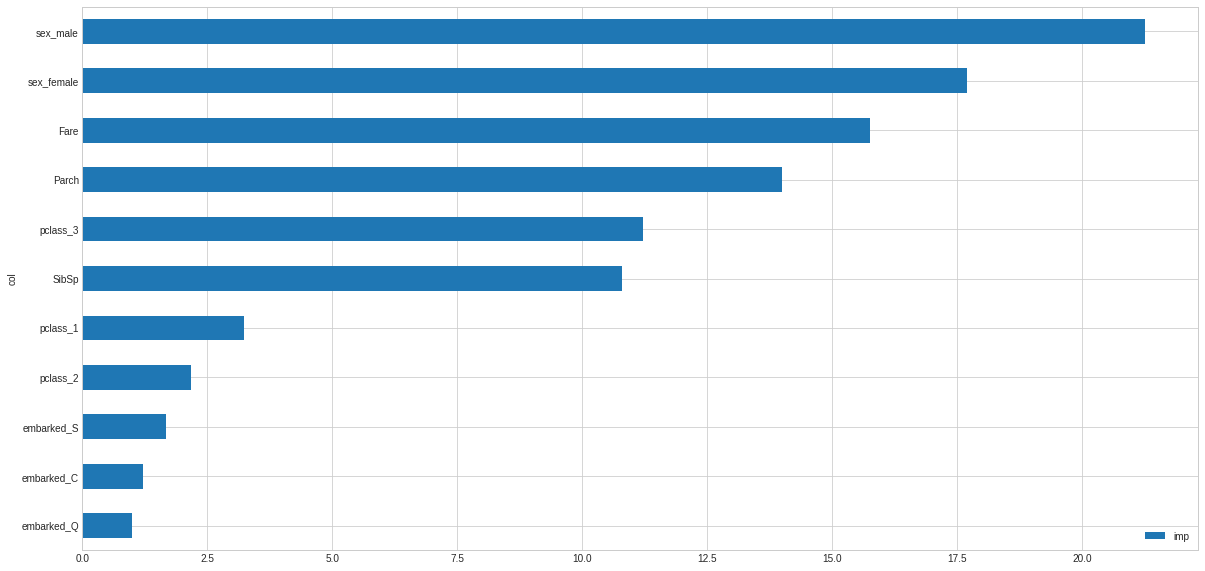

In [40]:
feature_importance(catboost_model, X_train)


In [41]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


# Submission

In [42]:
test.head()


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [43]:
Hot_ENC_Embarked_Test = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

Hot_ENC_Sex_Test = pd.get_dummies(test['Sex'], 
                                prefix='sex')

Hot_ENC_Pclass_Test = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')
test = pd.concat([test, 
                  Hot_ENC_Embarked_Test, 
                  Hot_ENC_Sex_Test, 
                  Hot_ENC_Pclass_Test], axis=1)

In [44]:
test.head()


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  embarked_C  \
0  34.5      0      0   330911   7.8292   NaN        Q           0   
1  47.0      1      0   363272   7.0000   NaN        S           0   
2  62.0      0      0   240276   9.6875   NaN        Q           0   
3  27.0      0      0   315154   8.6625   NaN        S           0   
4  22.0      1      1  3101298  12.2875   NaN        S           0   

   embarked_Q  embarked_S  sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           1           0           0         1         0         0         1  
1           0           1           1         0         0         0         1  
2           1           0           0         1         0         1         0  
3           0           1           0         1         0         0         1  
4           0           1           1         0         0         0         1

In [45]:
test_columns = X_train.columns
test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

# prediction

In [46]:
predictions = catboost_model.predict(test[test_columns])
predictions[:20]


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [47]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions 
submission['Survived'] = submission['Survived'].astype(int)

submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [48]:
if len(submission) == len(test):
    print("Yes, You do it Baby ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Yes, You do it Baby (418 rows).


In [49]:
submission.to_csv('./submission.csv', index=False)

print('Cool , you can submit for frist compeition!')

Cool , you can submit for frist compeition!
